In [1]:
%matplotlib inline

import spiceypy
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

In [2]:
spiceypy.furnsh('/Users/mcosta/MARS-EXPRESS/kernels/mk/MEX_OPS_LOCAL.TM')

et = spiceypy.utc2et('2010-08-27T20:31:56')

sensor_name = 'MEX_HRSC_SRC'

sensor_id = spiceypy.bodn2c(sensor_name)
(shape, frame, bsight, vectors, bounds) = spiceypy.getfov(sensor_id, 100)

4 [[  4.64050347   4.64050347 984.73813222]
 [ -4.64050347   4.64050347 984.73813222]
 [ -4.64050347  -4.64050347 984.73813222]
 [  4.64050347  -4.64050347 984.73813222]]


In [3]:
nx, ny = (1024, 1024)
x = np.linspace(bounds[0][0], bounds[2][0], nx)
y = np.linspace(bounds[0][1], bounds[2][1], ny)
xv, yv = np.meshgrid(x, y)

phase_matrix = np.zeros((1024, 1024))
emissn_matrix = np.zeros((1024, 1024))
solar_matrix = np.zeros((1024, 1024))
libsight = []
for i, x in enumerate(xv):
    for j, y in enumerate(yv):
        ibsight = [x[i], y[j], bsight[2]]
        libsight.append(ibsight)
        try:
            (spoint, trgepc, srfvec ) = spiceypy.sincpt('ELLIPSOID', 'PHOBOS', et, 'IAU_PHOBOS', 'NONE', 'MEX', frame, ibsight)
            (trgepc, srfvec, phase, solar, emissn) = spiceypy.ilumin('ELLIPSOID', 'PHOBOS', et, 'IAU_PHOBOS', 'NONE', 'MEX', spoint)
            emissn_matrix[i,j] = emissn
            phase_matrix[i,j] = phase
            solar_matrix[i,j] = solar
        except:
            pass
            emissn_matrix[i,j] = 0
            phase_matrix[i,j] = math.pi
            solar_matrix[i,j] = 0

In [4]:
mpl.rcParams['figure.figsize'] = (26.0, 26.0)
plt.pcolor(xv, yv, solar_matrix)

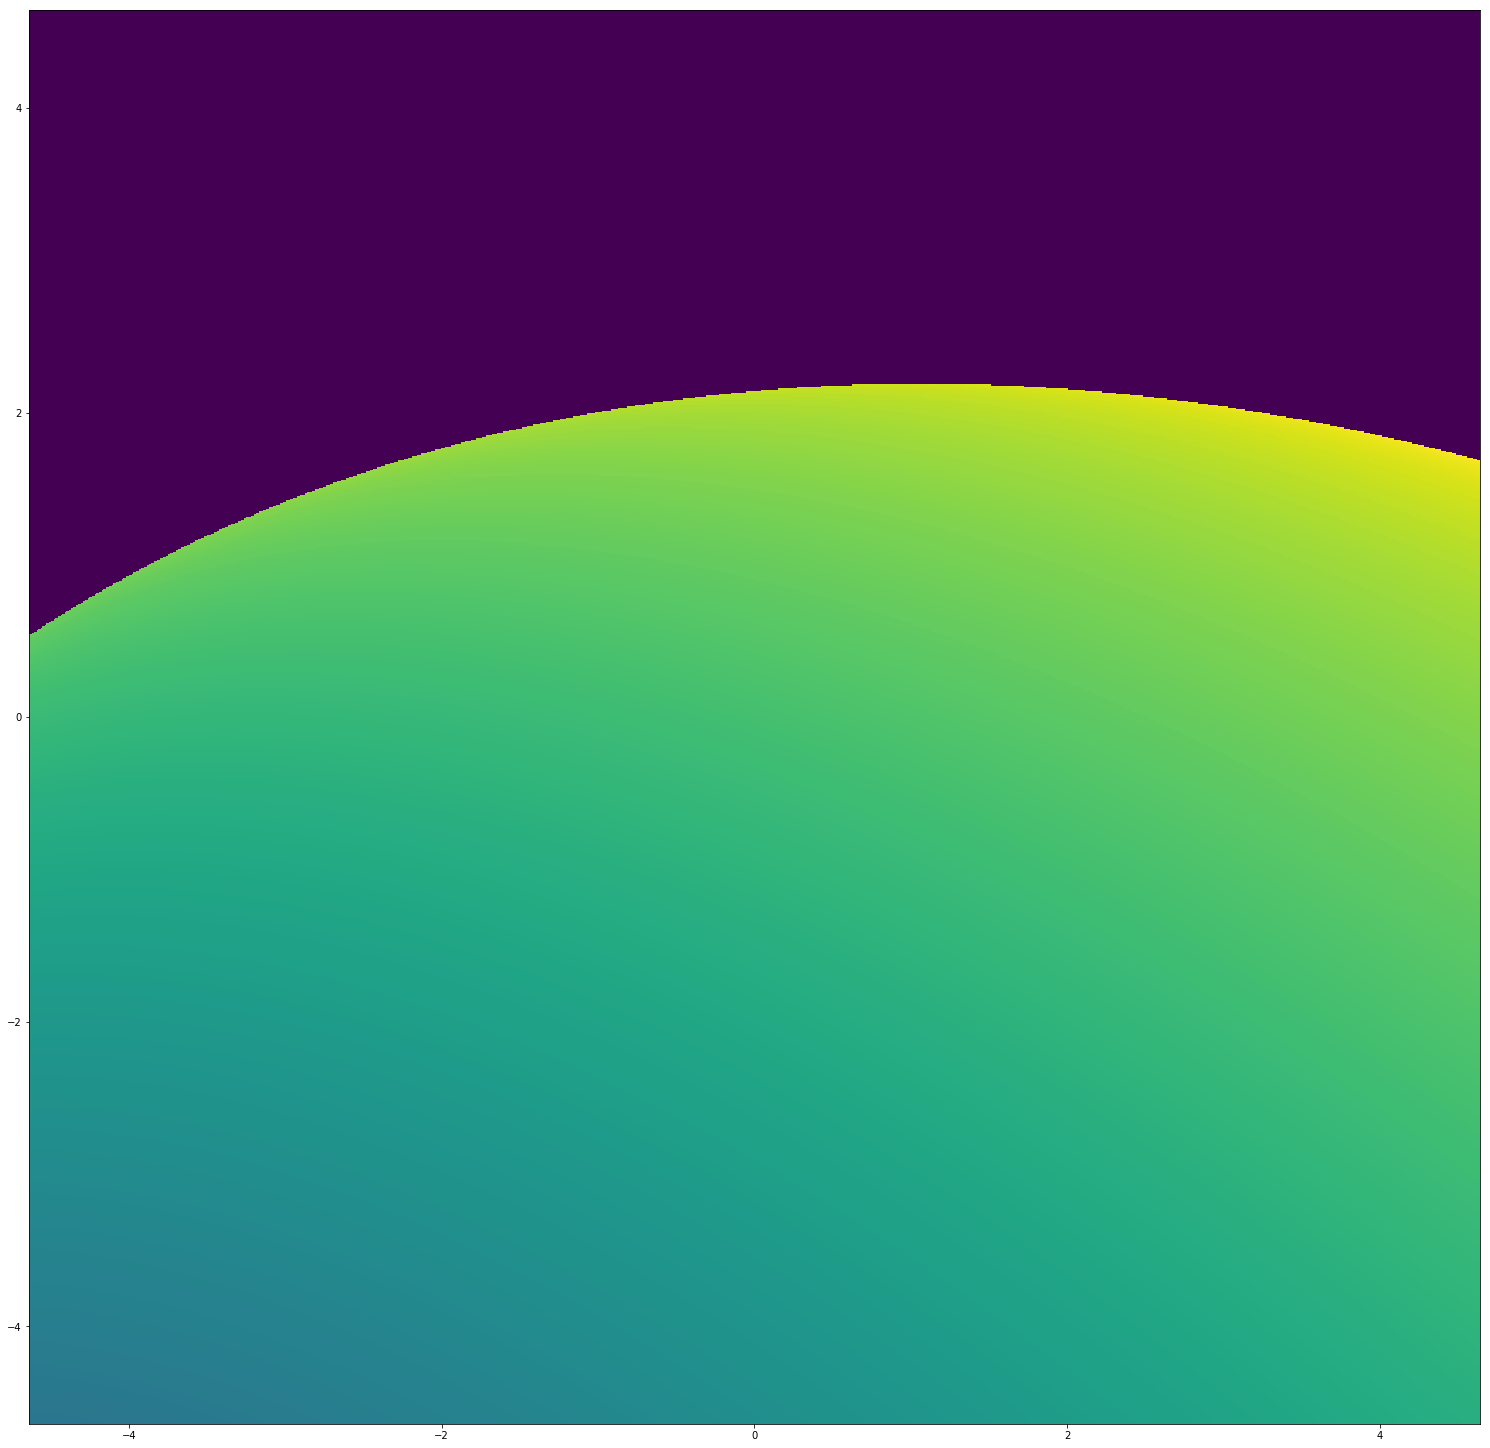

In [6]:
spiceypy.furnsh('/Users/mcosta/MARS-EXPRESS/kernels/dsk/PHOBOS_M157_GAS_V01.BDS')

In [7]:
nx, ny = (1024, 1024)
x = np.linspace(bounds[0][0], bounds[2][0], nx)
y = np.linspace(bounds[0][1], bounds[2][1], ny)
xv, yv = np.meshgrid(x, y)

phase_matrix = np.zeros((1024, 1024))
emissn_matrix = np.zeros((1024, 1024))
solar_matrix = np.zeros((1024, 1024))
libsight = []
for i, x in enumerate(xv):
    for j, y in enumerate(yv):
        ibsight = [x[i], y[j], bsight[2]]
        libsight.append(ibsight)
        try:
            (spoint, trgepc, srfvec ) = spiceypy.sincpt('DSK/UNPRIORITIZED', 'PHOBOS', et, 'IAU_PHOBOS', 'NONE', 'MEX', frame, ibsight)
            (trgepc, srfvec, phase, solar, emissn) = spiceypy.ilumin('DSK/UNPRIORITIZED', 'PHOBOS', et, 'IAU_PHOBOS', 'NONE', 'MEX', spoint)
            emissn_matrix[i,j] = emissn
            phase_matrix[i,j] = phase
            solar_matrix[i,j] = solar
        except:
            pass
            emissn_matrix[i,j] = 0
            phase_matrix[i,j] = math.pi
            solar_matrix[i,j] = 0

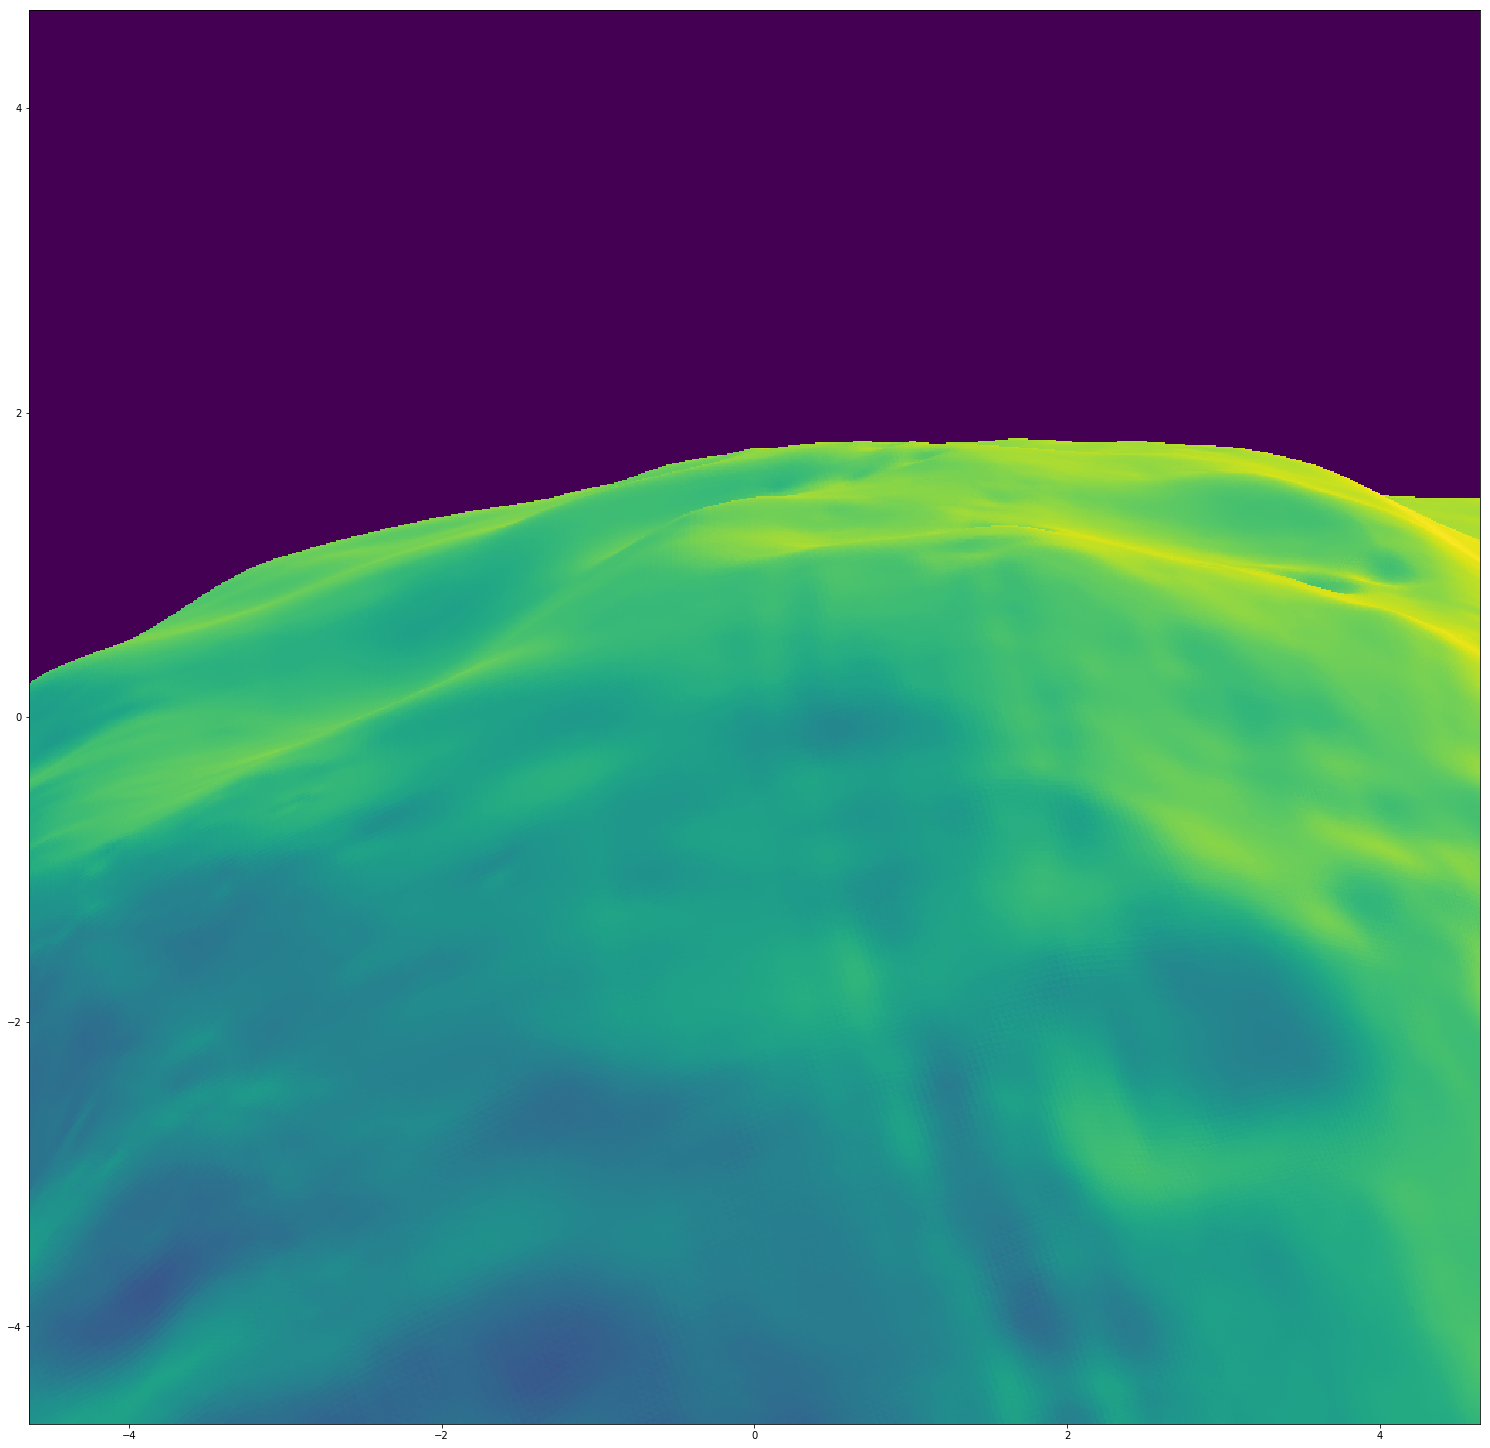

In [8]:
plt.pcolor(xv, yv, solar_matrix)